# <center>超级码力笔试第一题</center>

<div align="left">
    <img src="./super1.png"  alt="超级码力笔试第一题" />
</div>

## 算法SVM，原理如下：

<div align="left">
    <img src="./SVM.png"  alt="超级玛丽笔试第一题" />
</div>

## 编程工具：python3 + scikit-learn中的SVC

## SVC官方API文档: 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

## 关键参数总结如下：

### 惩罚系数C：
分类模型原型形式和对偶形式中的惩罚系数C，默认为1，一般需要通过交叉验证来选择一个合适的C。一般来说，如果噪音点较多时，C需要小一些。

### 核函数 kernel：
核函数有四种内置选择：‘linear’即线性核函数, ‘poly’即多项式核函数, ‘rbf’即高斯核函数, ‘sigmoid’即sigmoid核函数。默认是高斯核‘rbf’。

还有一种选择为‘precomputed’,即我们预先计算出所有的训练集和测试集的样本对应的Gram矩阵，这样K(x,z)直接在对应的Gram矩阵中找对应的位置的值。

### 核函数参数degree：
如果我们在kernel参数使用了多项式核函数 'poly'，那么我们就需要对这个参数进行调参。这个参数对应K(x,z)=（γx∙z+r)d中的d。默认是3。一般需要通过交叉验证选择一组合适的γ,r,d

### 核函数参数gamma ：
如果我们在kernel参数使用了多项式核函数 'poly'，高斯核函数‘rbf’, 或者sigmoid核函数，那么我们就需要对这个参数进行调参。

多项式核函数中这个参数对应K(x,z)=（γx∙z+r)d中的γ。一般需要通过交叉验证选择一组合适的γ,r,d 

高斯核函数中这个参数对应K(x,z)=exp(−γ||x−z||2)中的γ。一般需要通过交叉验证选择合适的γ
sigmoid核函数中这个参数对应K(x,z)=tanh（γx∙z+r)中的γ。一般需要通过交叉验证选择一组合适的γ,r 

γ默认为'auto',即1特征维度

###  核函数参数coef0：
如果我们在kernel参数使用了多项式核函数 'poly'，或者sigmoid核函数，那么我们就需要对这个参数进行调参。

多项式核函数中这个参数对应K(x,z)=（γx∙z+r)d中的r。一般需要通过交叉验证选择一组合适的γ,r,d 

sigmoid核函数中这个参数对应K(x,z)=tanh（γx∙z+r)中的r。一般需要通过交叉验证选择一组合适的γ,r 

coef0默认为0

###  样本权重class_weight：
指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"

### 分类决策decision_function_shape：
可以选择'ovo'或者‘ovo’.

### 缓存大小cache_size：
在大样本的时候，缓存大小会影响训练速度，因此如果机器内存大，推荐用500MB甚至1000MB。默认是200，即200MB.

## 我脑中的特征工程“决策树”： 
#### 看不清楚可下载后观看
<div align="left">
    <img src="./FeatureEngineering.png"  alt="特征工程决策树" />
</div>



### 先对数据有个总体认知：

In [63]:
import pandas as pd
import numpy as np
X = pd.read_csv('./Test1_features.csv',header=None,sep=',') 
y = pd.read_csv('./Test1_labels.csv',header=None,sep=',')
df = X.copy()
df['y'] = y
print(df.shape)
df.head()

(20536, 62)


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,y
0,0.002690,0.002630,0.002743,0.002506,0.002737,0.002791,0.002590,0.002726,0.002484,0.002841,...,0.000849,0.001611,-0.000375,-0.000097,0.000300,-0.000327,-0.000777,0.000558,-0.001546,0
1,0.002719,0.002617,0.002737,0.002715,0.002794,0.002601,0.002636,0.002523,0.002591,0.002842,...,0.000300,-0.000327,-0.000777,0.000558,-0.001546,0.000802,-0.000707,-0.001041,0.001237,0
2,0.003065,0.002631,0.002710,0.002841,0.002624,0.002595,0.002575,0.002562,0.002568,0.002805,...,-0.001546,0.000802,-0.000707,-0.001041,0.001237,0.000635,-0.001843,0.000294,0.004381,0
3,0.002838,0.002867,0.002596,0.002727,0.002702,0.002556,0.002524,0.002426,0.002515,0.002871,...,0.001237,0.000635,-0.001843,0.000294,0.004381,-0.002215,0.000085,-0.000257,0.000111,0
4,0.002715,0.002743,0.002506,0.002737,0.002791,0.002590,0.002726,0.002484,0.002841,0.002876,...,0.004381,-0.002215,0.000085,-0.000257,0.000111,-0.001733,0.000205,0.000983,-0.000687,0


#### 考虑到SVM只用支持向量优化模型参数，所以SVM对异常数据不敏感，也就不需要处理异常数据了。
#### 来简单看一下各特征数据分布情况吧

In [64]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,y
count,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,...,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000,20536.000000
mean,0.280840,0.191621,0.200414,0.209932,0.219502,0.228368,0.235957,0.243107,0.249982,0.256800,...,0.005001,0.006774,0.010448,0.004722,0.006377,0.006961,0.012285,0.022152,0.046366,0.609223
std,0.329204,0.204646,0.207465,0.210597,0.213606,0.215833,0.216641,0.217807,0.219981,0.222512,...,0.203977,0.189287,0.222141,0.215072,0.221367,0.208717,0.236225,1.201108,2.009693,0.487936
min,0.002174,0.000525,0.000525,0.000540,0.000540,0.000532,0.000532,0.000541,0.000541,0.002174,...,-10.540000,-4.977000,-3.973000,-6.945700,-10.540000,-9.132000,-3.973000,-6.945700,-56.062000,0.000000
25%,0.099018,0.040698,0.048296,0.055678,0.063409,0.071543,0.077776,0.082595,0.087183,0.091128,...,-0.011992,-0.012900,-0.012500,-0.012700,-0.012200,-0.013100,-0.012700,-0.012830,-0.012253,0.000000
50%,0.208715,0.123425,0.132115,0.141230,0.152040,0.162100,0.171015,0.179435,0.187105,0.194050,...,0.002100,0.002060,0.002120,0.002120,0.002100,0.002060,0.002120,0.002130,0.002110,1.000000
75%,0.389085,0.269215,0.282680,0.293893,0.306603,0.318300,0.328265,0.339680,0.350170,0.360803,...,0.018302,0.018200,0.018377,0.018625,0.018600,0.018600,0.018700,0.019200,0.019100,1.000000
max,10.526000,1.594900,1.594900,1.594900,1.594900,1.594900,1.594900,1.594900,1.756800,1.756800,...,6.523700,4.685600,13.894000,6.911100,6.757000,4.685600,13.894000,101.300000,99.892000,1.000000


#### 重点看一下标签有几种分类：

In [65]:
print(y[0].groupby(y[0]).count())#df.groupby('y').agg(np.size)

0
0     8025
1    12511
Name: 0, dtype: int64


#### 可以看出这是个二分类任务，样本分布不是特别不均衡

#### 判断是否有缺失值

In [66]:
#df.iloc[1:3,1] = np.nan
print(True in df.isnull().any().tolist())

False


#### OK！ 没有缺失值

#### 看看各特征之间及与标签的皮尔逊相关系数

In [67]:
df.corr(method ='pearson',min_periods = 1)['y'].abs().sort_values()

54    0.000168
20    0.003330
58    0.005743
59    0.007475
14    0.013870
60    0.014105
13    0.014829
40    0.015805
56    0.016234
57    0.016318
53    0.018614
52    0.022497
55    0.022665
51    0.024020
12    0.032626
39    0.033384
15    0.042317
11    0.042452
38    0.046479
37    0.052567
36    0.056766
16    0.059311
31    0.060541
33    0.062013
34    0.062194
35    0.062486
32    0.063182
17    0.080610
18    0.101672
19    0.105842
        ...   
49    0.352208
48    0.355292
47    0.357948
30    0.357948
46    0.359954
45    0.362663
44    0.365954
43    0.368877
29    0.368877
42    0.370569
41    0.373473
28    0.379326
27    0.389608
10    0.389608
26    0.399757
25    0.409718
24    0.419493
23    0.428930
9     0.428930
22    0.437770
21    0.446120
8     0.461869
7     0.487896
6     0.505882
5     0.518734
4     0.527799
1     0.528909
2     0.531468
3     0.531512
y     1.000000
Name: y, Length: 62, dtype: float64

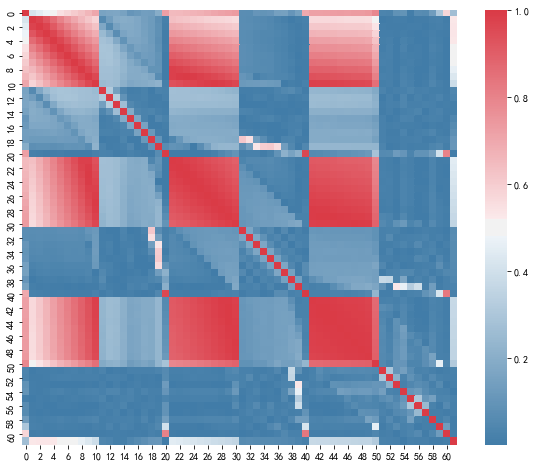

In [68]:
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
pl.rcParams['axes.unicode_minus']=False #用来正常显示负号
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr(method ='pearson',min_periods = 1).abs()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

#### 可以发现有很多特征互相强相关，而且互相强相关的特征也和输出强相关。
#### 可以试着做两件事：
#####       1.特征选择：利用末尾淘汰制，一个一个的减小权重最小的特征，直到减少一个特征后指标有明显下降，即手肘法
#####       2.降维：PCA、LDA

#### 先不着急做特征选择和降维，先所有特征一股脑儿加入炼丹炉，也许还不错呢。。。

In [69]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60    float64
y       int64
Length: 62, dtype: object

#### 看特征数据基本都是float64，为了加快SVM优化速度，对数据做z-score标准化：（x-mean)/std，均值0，方差1
关于使用sklearn进行数据预处理 —— 归一化/标准化/正则化：https://www.cnblogs.com/qqhfeng/p/5294767.html
API详解sklearn.preprocessing.StandardScaler：https://blog.csdn.net/weixin_39175124/article/details/79463993
##### 注意：如果要对数据做PCA降维，千万不能变方差，只需中心化即可，即均值0，方差不变

In [70]:
from sklearn import preprocessing
z_score = preprocessing.StandardScaler().fit(X)
# print(z_score.n_samples_seen_ )
# print(z_score.mean_)
# print(z_score.var_)
# print(z_score.scale_)
x_normalization=z_score.fit_transform(X)
x_normalization = pd.DataFrame(x_normalization)
x_normalization.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,...,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04,2.053600e+04
mean,-6.126338e-17,2.116863e-16,-4.391155e-16,-2.627643e-16,-9.644711e-18,-1.991871e-16,4.748831e-16,-2.224122e-16,5.461804e-16,4.632273e-16,...,2.838270e-18,-3.143029e-17,6.487474e-18,-3.317262e-17,8.931089e-18,2.184116e-17,-3.248062e-17,1.459465e-16,1.167745e-18,2.388472e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,...,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-8.465050e-01,-9.338106e-01,-9.635063e-01,-9.943032e-01,-1.025096e+00,-1.055641e+00,-1.086734e+00,-1.113702e+00,-1.133950e+00,-1.144353e+00,...,-3.360442e+01,-5.169834e+01,-2.632977e+01,-1.793251e+01,-3.231747e+01,-4.764322e+01,-4.378743e+01,-1.687116e+01,-5.801328e+00,-2.791955e+01
25%,-5.523220e-01,-7.375030e-01,-7.332436e-01,-7.324793e-01,-7.307699e-01,-7.266231e-01,-7.301692e-01,-7.369659e-01,-7.400812e-01,-7.445717e-01,...,-8.186860e-02,-8.331240e-02,-1.039413e-01,-1.033056e-01,-8.100783e-02,-8.392344e-02,-9.611693e-02,-1.057714e-01,-2.912538e-02,-2.916854e-02
50%,-2.190955e-01,-3.332482e-01,-3.292173e-01,-3.262345e-01,-3.158310e-01,-3.070429e-01,-2.997766e-01,-2.923413e-01,-2.858381e-01,-2.820143e-01,...,-1.195502e-02,-1.422195e-02,-2.490611e-02,-3.748993e-02,-1.209908e-02,-1.932324e-02,-2.348094e-02,-4.303293e-02,-1.666991e-02,-2.202175e-02
75%,3.288144e-01,3.791712e-01,3.965373e-01,3.986875e-01,4.077737e-01,4.166828e-01,4.260957e-01,4.433967e-01,4.554499e-01,4.674135e-01,...,6.675820e-02,6.521307e-02,6.036312e-02,3.569738e-02,6.464443e-02,5.521545e-02,5.576704e-02,2.715622e-02,-2.457692e-03,-1.356752e-02
max,3.112172e+01,6.857281e+00,6.721711e+00,6.576557e+00,6.439108e+00,6.331588e+00,6.272933e+00,6.206528e+00,6.849942e+00,6.741378e+00,...,3.339272e+01,3.195883e+01,2.471870e+01,6.250037e+01,3.211267e+01,3.049591e+01,2.241673e+01,5.876633e+01,8.432240e+01,4.968324e+01


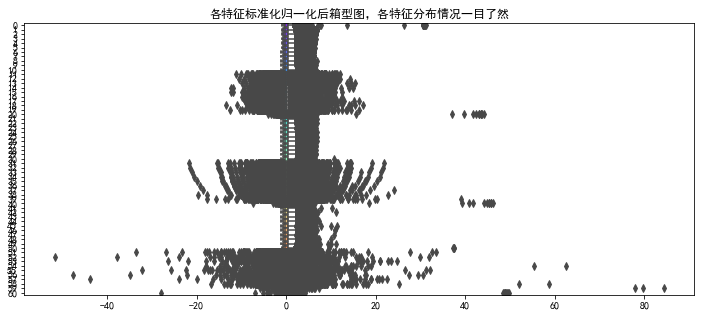

In [71]:
pl.figure(figsize=(12,5))
pl.title(u"各特征标准化归一化后箱型图，各特征分布情况一目了然")
sns.boxplot(data =  x_normalization , orient="h", palette = 'rainbow')

##### 分割数据

In [72]:
from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=0)

##### 看一下分割为训练集70%，测试集30%后的数据分布

In [73]:
print(y_train[0].groupby(y_train[0]).count())
print(y_test[0].groupby(y_test[0]).count())

0
0    2378
1    3782
Name: 0, dtype: int64
0
0    5647
1    8729
Name: 0, dtype: int64


##### 分布正常，接下来设置超参数范围，进行交叉验证
###### 使用交叉验证的网格搜索进行参数估计官方例子： 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
###### 网格搜索交叉验证官方API文档: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
###### sklearn.metrics.f1_score :
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score 
###### 模型评估指标总结：
https://www.cnblogs.com/pinard/p/5993450.html 
###### 模型评估指标官网总结:
https://scikit-learn.org/stable/modules/model_evaluation.html

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'C': 3000, 'gamma': 2.1, 'kernel': 'rbf'}

Grid scores on development set:



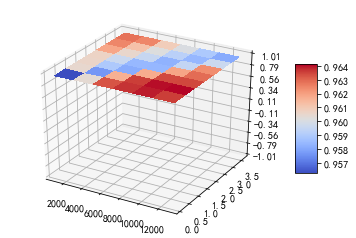

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      5647
          1       0.97      0.97      0.97      8729

avg / total       0.97      0.97      0.97     14376




In [77]:
#设置超参数范围
#第一次对于'f1', 'roc_auc'，最好的参数都是{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 5折
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
# scores = ['f1', 'roc_auc']



#核函数确定为高斯核，判定标准确定为'f1'，电脑性能有限，以后再细致的调参。
#第二次最好参数是{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'} 3折
# tuned_parameters = [{'kernel': ['rbf'], 
#                      'gamma': [0.01,0.005,0.001, 0.0005],
#                      'C': [1, 10, 100, 1000]},
#                     ]
# score = 'f1'


# #第三次最好参数是{'C': 1000, 'gamma': 0.05, 'kernel': 'rbf'} 3折
# tuned_parameters = [{'kernel': ['rbf'], 
#                      'gamma': [0.05,0.02,0.01, 0.005],
#                      'C': [ 700, 1000, 5000, 10000]},
#                     ]
# score = 'f1'

# #第四次最好参数是{'C': 10000, 'gamma': 0.3, 'kernel': 'rbf'} 3折 4*4=16
# tuned_parameters = [{'kernel': ['rbf'], 
#                      'gamma': [0.3,0.2,0.1, 0.05],
#                      'C': [ 10000, 20000, 30000, 40000]},
#                     ]
# score = 'f1'


# #第五次最好参数是{'C': 7000, 'gamma': 1.9, 'kernel': 'rbf'} 3折
#从早10点到晚6点都没跑完。。。。。。。40*90=3600 确实太多,以后注意采集一轮所需时间,更合理安排自己任务
#放弃
# tuned_parameters = [{'kernel': ['rbf'], 
#                      'gamma': np.arange(0.1, 8, 0.2),
#                      'C': np.arange(1000, 10000, 100)},
#                     ]
# score = 'f1'

# #第五次最好参数是{'C': 7000, 'gamma': 1.9, 'kernel': 'rbf'} 3折
# 8*7 = 56
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': np.arange(0.1, 4, 0.5),
                     'C': np.arange(1000, 15000, 2000)},
                    ]

score = 'f1'


print("# Tuning hyper-parameters for %s" % score)
print()

clf = GridSearchCV(SVC(), tuned_parameters, cv=3,
            scoring='%s' % score)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']


# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#             % (mean, std * 2, params))
    
# print()
#############################################
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
 
 
fig = plt.figure()
ax = fig.gca(projection='3d')
 
X1 = np.array(tuned_parameters[0]['C'])
Y1 = np.array(tuned_parameters[0]['gamma'])

X1, Y1 = np.meshgrid(X1, Y1)
Z1 = np.array(means)#[::-1]
Z1 = np.reshape(Z1, X1.shape)


# Plot the surface.
surf = ax.plot_surface(X1, Y1, Z1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
 
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
 
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
 
plt.show()
#############################################
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

## 后续调参工作
##### 1.这次调的超参很可能只是局部最优解，需要进一步扩大范围，及减小步长，进一步提高准确率
##### 2.其它核函数及核函数对应超参，进一步提高准确率
##### 3.简化模型，提高性能，提高泛化能力
###### 3.1 LDA根据标签对特征降维
3.2.1 特征选择：利用末尾淘汰制，一个一个的减小权重最小的特征，直到减少一个特征后指标有明显下降，即手肘法

3.2.2 中心化后对特征PCA降维

# 谢谢观看！